## Tasks

#### Done
+ import data from the database

+ get the average mileage from the web

+ show on a plot how the fuel price changed within time

+ which car is the most economic?

+ compute the average yearly cost for each car

+ based on the cars spec features, predict its mpg
    - preprocess data
    - remove redundant features

#### Remaing

- get the best performing model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3

In [2]:

class Server():
    def __init__(self, db_name):
        try:
            self.conn = sqlite3.connect(db_name)
            self.c = self.conn.cursor()
        except sqlite3.Error:
            print('Error while connecting to database')

    def execute(self, command):
        self.c.execute(command)

    def commit(self):
        self.conn.commit()

    def close(self):
        self.conn.close()

In [3]:
db = Server('Database/database.db')

In [4]:
cars = pd.read_sql_query("SELECT mark_model, hp, weight, acc_time, range_miles, mpg FROM Cars JOIN Spec ON Cars.id = Spec.car_id WHERE origin='US'", db.conn)
fuel_prices = pd.read_sql_query("SELECT date, price_gallon FROM Prices WHERE region = 'US';", db.conn, index_col='DATE')
fuel_prices.index = pd.to_datetime(fuel_prices.index)


display(cars.head())
display(fuel_prices.head())

,mark_model,hp,weight,acc_time,range_miles,mpg
0,chevrolet chevelle malibu,130,3504,12.0,307.0,18.0
1,buick skylark 320,165,3693,11.5,350.0,15.0
2,plymouth satellite,150,3436,11.0,318.0,18.0
3,amc rebel sst,150,3433,12.0,304.0,16.0
4,ford torino,140,3449,10.5,302.0,17.0


,price_gallon
DATE,
1990-08-31,1.2180
1990-09-30,1.2580
1990-10-31,1.3354
1990-11-30,1.3240
1990-12-31,1.3410


### There are no missing values thanks to the prior data preparation while creating the database

In [5]:
cars.isna().sum(), fuel_prices.isna().sum()

(mark_model     0
 hp             0
 weight         0
 acc_time       0
 range_miles    0
 mpg            0
 dtype: int64,
 price_gallon    0
 dtype: int64)

In [6]:
yr_91 = fuel_prices.loc['1991', 'price_gallon'].values
yr_00 = fuel_prices.loc['2000', 'price_gallon'].values
yr_19 = fuel_prices.loc['2019', 'price_gallon'].values
chg_idx = fuel_prices.loc['1991', 'price_gallon'].index.strftime('%d-%m')

chg = pd.DataFrame({'1991': yr_91,'2000':yr_00 ,'2019':yr_19}, index=chg_idx)
chg

,1991,2000,2019
DATE,,,
31-01,1.26050,1.27880,2.14500
28-02,1.09425,1.37050,2.22250
31-03,1.04000,1.49825,2.44300
30-04,1.07620,1.43650,2.69400
31-05,1.12575,1.45640,2.73125
30-06,1.12825,1.61175,2.60125
31-07,1.09560,1.52880,2.64040
31-08,1.11475,1.43925,2.52100
30-09,1.10920,1.52525,2.48880


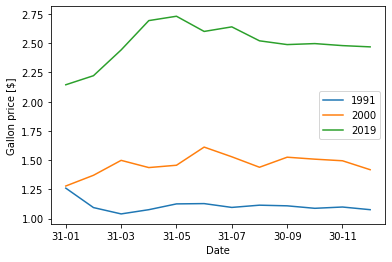

In [7]:
chg.plot()
plt.xlabel('Date')
plt.ylabel('Gallon price [$]')
plt.legend
plt.show()

Change in the fuel price

In [8]:
print(chg['2019'] - chg['1991'])

DATE
31-01    0.88450
28-02    1.12825
31-03    1.40300
30-04    1.61780
31-05    1.60550
30-06    1.47300
31-07    1.54480
31-08    1.40625
30-09    1.37960
31-10    1.40925
30-11    1.38100
31-12    1.39300
dtype: float64


Calculating the yearly percentage change


In [9]:
yearly_change = fuel_prices.resample('A').last().pct_change() * 100
yearly_change

,price_gallon
DATE,
1990-12-31,NaN
1991-12-31,-19.746458
1992-12-31,0.120795
1993-12-31,-5.893271
1994-12-31,4.511834
1995-12-31,0.542581
1996-12-31,15.757860
1997-12-31,-9.307605
1998-12-31,-17.508493


## Plotting the yearly price fluctuations

Text(0.5, 0, 'Year')

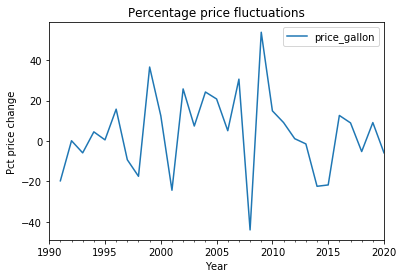

In [10]:
yearly_change.plot()

plt.title('Percentage price fluctuations')
plt.ylabel('Pct price change')
plt.xlabel('Year')

## Plotting the fuel price change over the last 20 years

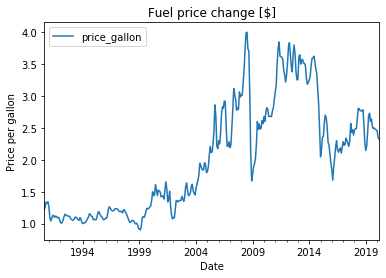

In [11]:
fuel_prices.plot()
plt.title('Fuel price change [$]')
plt.xlabel('Date')
plt.ylabel('Price per gallon')
plt.xticks(rotation=0)
plt.show()

## Getting the average mileage per year

In [12]:
from selenium import webdriver

driver = webdriver.Chrome()

driver.get('https://www.fhwa.dot.gov/ohim/onh00/bar8.htm')
avg_mileage = driver.find_element_by_xpath('/html/body/table[2]/tbody/tr[7]/td[4]').text

driver.close()

avg_mileage = float(avg_mileage.replace(',', ''))
avg_mileage


13476.0

In [13]:
display(cars)

,mark_model,hp,weight,acc_time,range_miles,mpg
0,chevrolet chevelle malibu,130,3504,12.0,307.0,18.0
1,buick skylark 320,165,3693,11.5,350.0,15.0
2,plymouth satellite,150,3436,11.0,318.0,18.0
3,amc rebel sst,150,3433,12.0,304.0,16.0
4,ford torino,140,3449,10.5,302.0,17.0
...,...,...,...,...,...,...
180,chevrolet camaro,90,2950,17.3,151.0,27.0
181,ford mustang gl,86,2790,15.6,140.0,27.0
182,dodge rampage,84,2295,11.6,135.0,32.0
183,ford ranger,79,2625,18.6,120.0,28.0


## 20 Most economic cars

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

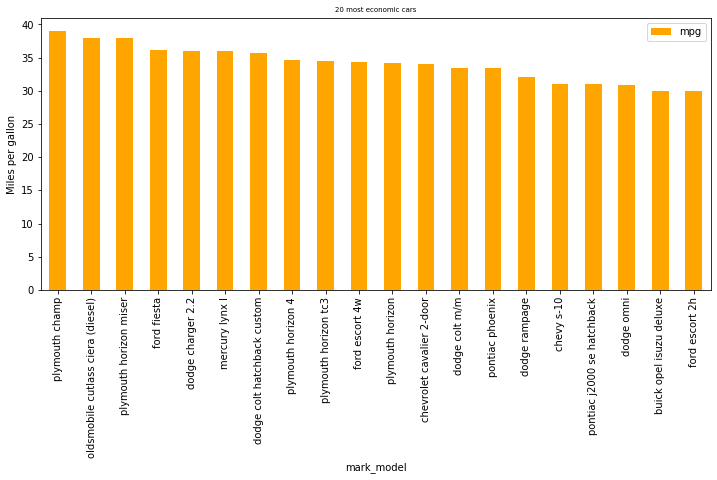

In [14]:
mpg_sorted = cars.sort_values(by='mpg', ascending=False)

mpg_sorted[:20].plot(kind='bar', x='mark_model', y='mpg', figsize=(12, 5), color='orange')
plt.title('20 most economic cars', size=7)
plt.ylabel('Miles per gallon')
plt.xticks(size=10)

## Yearly cost for each car

### Computation description

### Calculations

In [15]:
cars_calculations = cars.copy()
cars_calculations

,mark_model,hp,weight,acc_time,range_miles,mpg
0,chevrolet chevelle malibu,130,3504,12.0,307.0,18.0
1,buick skylark 320,165,3693,11.5,350.0,15.0
2,plymouth satellite,150,3436,11.0,318.0,18.0
3,amc rebel sst,150,3433,12.0,304.0,16.0
4,ford torino,140,3449,10.5,302.0,17.0
...,...,...,...,...,...,...
180,chevrolet camaro,90,2950,17.3,151.0,27.0
181,ford mustang gl,86,2790,15.6,140.0,27.0
182,dodge rampage,84,2295,11.6,135.0,32.0
183,ford ranger,79,2625,18.6,120.0,28.0


### Calculating the yearly refuelings for each car and the fuel tank capacity

In [16]:
cars_calculations['yearly_refuelings'] = (avg_mileage / cars_calculations['range_miles']).round()
cars_calculations['fuel_tank_capacity'] = cars_calculations['range_miles'] / cars_calculations['mpg']
cars_calculations['gallons_each_year'] = cars_calculations['fuel_tank_capacity'] * cars_calculations['yearly_refuelings']

cars_calculations

,mark_model,hp,weight,acc_time,range_miles,mpg,yearly_refuelings,fuel_tank_capacity,gallons_each_year
0,chevrolet chevelle malibu,130,3504,12.0,307.0,18.0,44.0,17.055556,750.444444
1,buick skylark 320,165,3693,11.5,350.0,15.0,39.0,23.333333,910.000000
2,plymouth satellite,150,3436,11.0,318.0,18.0,42.0,17.666667,742.000000
3,amc rebel sst,150,3433,12.0,304.0,16.0,44.0,19.000000,836.000000
4,ford torino,140,3449,10.5,302.0,17.0,45.0,17.764706,799.411765
...,...,...,...,...,...,...,...,...,...
180,chevrolet camaro,90,2950,17.3,151.0,27.0,89.0,5.592593,497.740741
181,ford mustang gl,86,2790,15.6,140.0,27.0,96.0,5.185185,497.777778
182,dodge rampage,84,2295,11.6,135.0,32.0,100.0,4.218750,421.875000
183,ford ranger,79,2625,18.6,120.0,28.0,112.0,4.285714,480.000000


### Calculating the approximate amount spend on fuel in 2019 for each car

In [17]:
# Calculating average gallon price in 2019 [$]
average_gallon_price = fuel_prices.loc['2019'].mean()
average_gallon_price

price_gallon    2.494471
dtype: float64

In [18]:
cars_calculations['yearly_spendings_usd'] = cars_calculations['gallons_each_year'].apply(lambda x: x*average_gallon_price)

In [19]:
cars_calculations

,mark_model,hp,weight,acc_time,range_miles,mpg,yearly_refuelings,fuel_tank_capacity,gallons_each_year,yearly_spendings_usd
0,chevrolet chevelle malibu,130,3504,12.0,307.0,18.0,44.0,17.055556,750.444444,1871.961779
1,buick skylark 320,165,3693,11.5,350.0,15.0,39.0,23.333333,910.000000,2269.968458
2,plymouth satellite,150,3436,11.0,318.0,18.0,42.0,17.666667,742.000000,1850.897358
3,amc rebel sst,150,3433,12.0,304.0,16.0,44.0,19.000000,836.000000,2085.377617
4,ford torino,140,3449,10.5,302.0,17.0,45.0,17.764706,799.411765,1994.109331
...,...,...,...,...,...,...,...,...,...,...
180,chevrolet camaro,90,2950,17.3,151.0,27.0,89.0,5.592593,497.740741,1241.599760
181,ford mustang gl,86,2790,15.6,140.0,27.0,96.0,5.185185,497.777778,1241.692148
182,dodge rampage,84,2295,11.6,135.0,32.0,100.0,4.218750,421.875000,1052.354883
183,ford ranger,79,2625,18.6,120.0,28.0,112.0,4.285714,480.000000,1197.346000


### The approximate yearly spendings for the least economic car model

In [20]:
cars_calculations.iloc[np.argmax(cars_calculations[['yearly_spendings_usd']]), :]

mark_model              hi 1200d
hp                           193
weight                      4732
acc_time                    18.5
range_miles                  304
mpg                            9
yearly_refuelings             44
fuel_tank_capacity       33.7778
gallons_each_year        1486.22
yearly_spendings_usd     3707.34
Name: 21, dtype: object

# Data preprocessing

In [21]:
cars_numeric = cars._get_numeric_data()
cars_numeric

,hp,weight,acc_time,range_miles,mpg
0,130,3504,12.0,307.0,18.0
1,165,3693,11.5,350.0,15.0
2,150,3436,11.0,318.0,18.0
3,150,3433,12.0,304.0,16.0
4,140,3449,10.5,302.0,17.0
...,...,...,...,...,...
180,90,2950,17.3,151.0,27.0
181,86,2790,15.6,140.0,27.0
182,84,2295,11.6,135.0,32.0
183,79,2625,18.6,120.0,28.0


## Feature correlations

In [22]:
corr = cars_numeric.corr()
corr

,hp,weight,acc_time,range_miles,mpg
hp,1.000000,0.831770,-0.722566,0.903985,-0.752847
weight,0.831770,1.000000,-0.439194,0.911973,-0.847439
acc_time,-0.722566,-0.439194,1.000000,-0.641047,0.380265
range_miles,0.903985,0.911973,-0.641047,1.000000,-0.825338
mpg,-0.752847,-0.847439,0.380265,-0.825338,1.000000


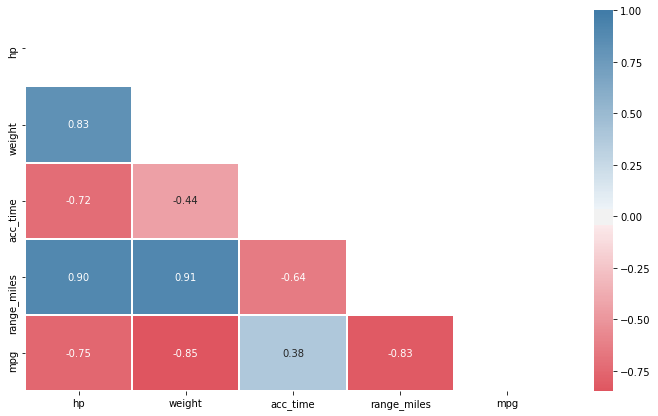

In [23]:
plt.figure(figsize=(12, 7))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

sns.heatmap(corr, center=0, linewidths=1, annot=True, fmt='.2f', cmap=cmap, mask=mask)

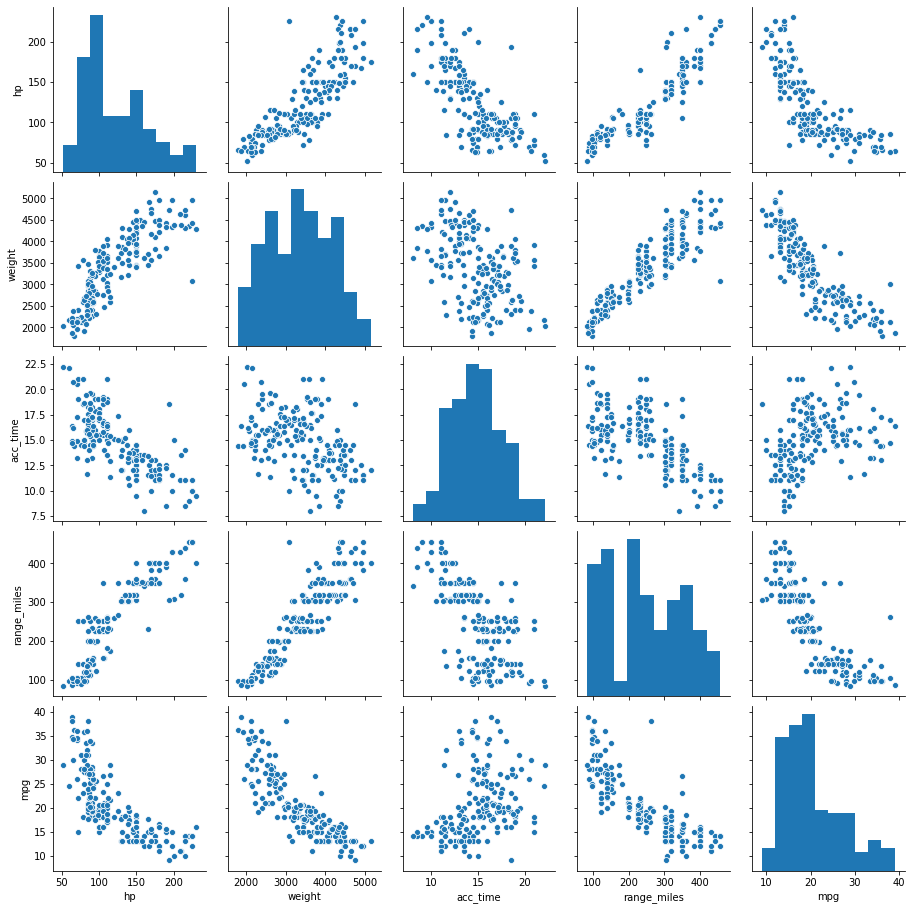

In [24]:
sns.pairplot(cars_numeric)

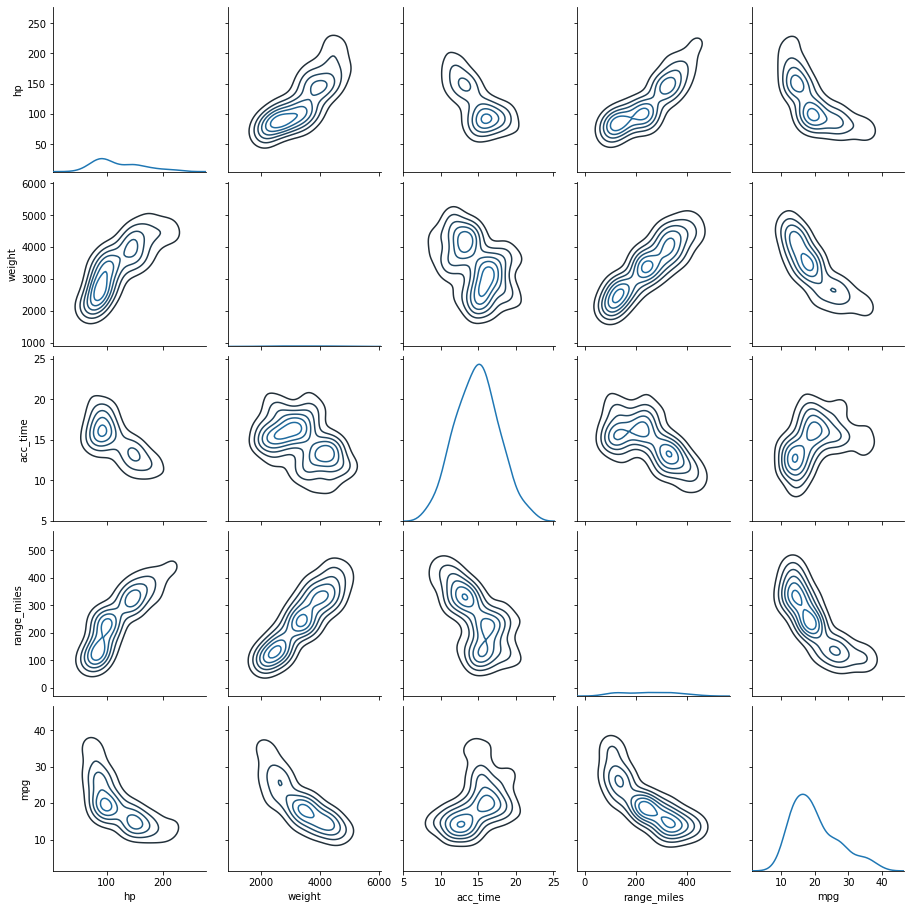

In [25]:
g = sns.PairGrid(cars_numeric)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

### Let's check the data distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002496D4E5B38>,
      dtype=object)

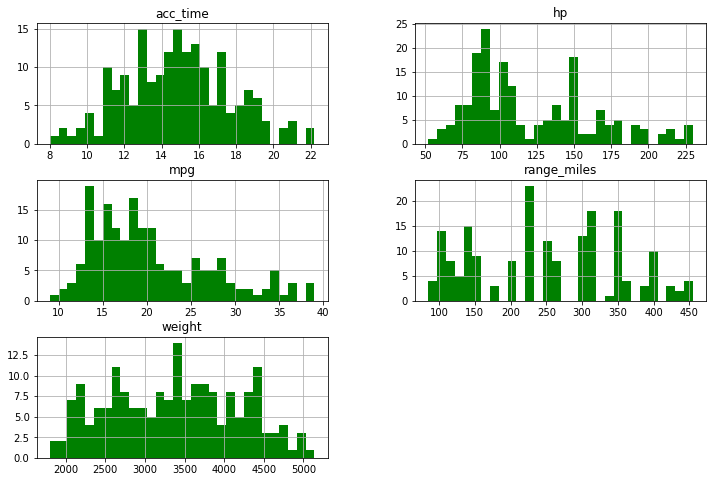

In [26]:
cars_numeric.hist(bins=30, figsize=(12, 8), color='g')

In [27]:
def display_dist_hist(X):
    for col in X._get_numeric_data():
        plt.subplots()
        sns.distplot(X[col], bins=30)

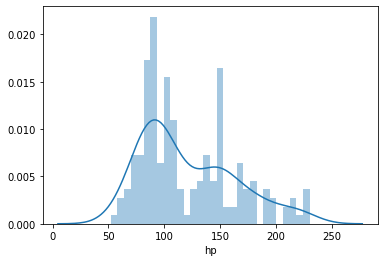

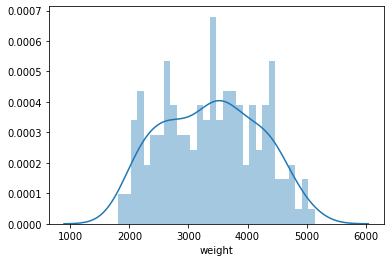

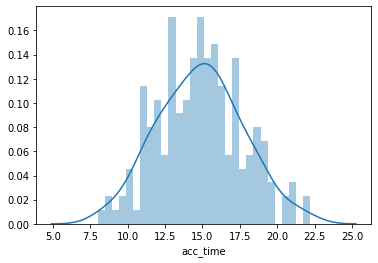

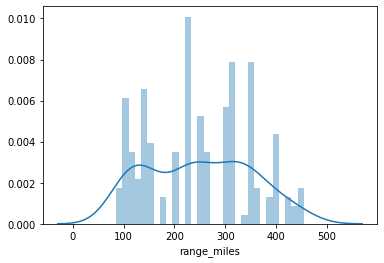

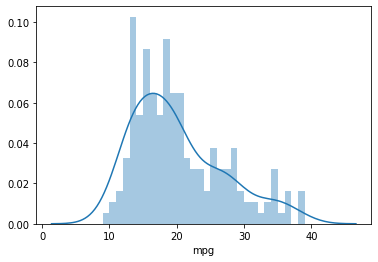

In [28]:
display_dist_hist(cars_numeric)

It seems that the features data is normally distributed except the hp column, search for outliers and then examine the data once more

## Searching for outliers

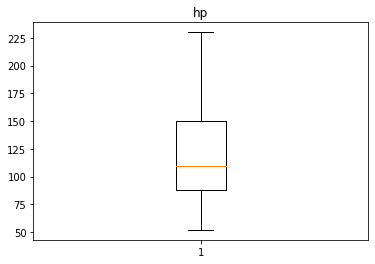

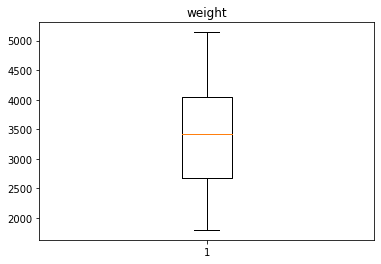

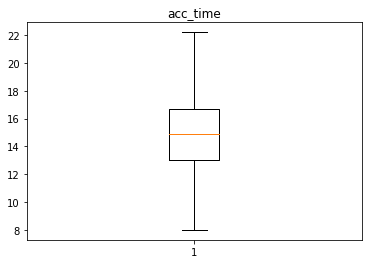

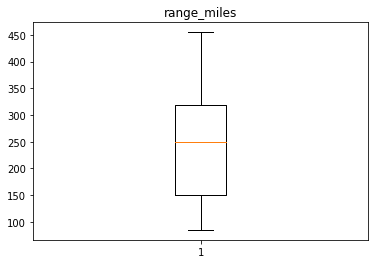

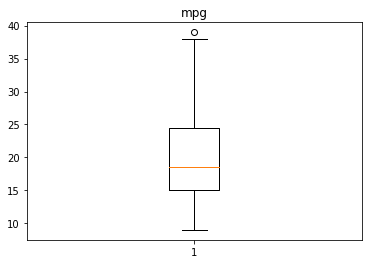

In [29]:
for col in cars_numeric:
    plt.subplots()
    plt.boxplot(cars_numeric[col])
    plt.title(col)

In [30]:
cars_numeric.shape

(185, 5)

In [31]:
percentiles = cars_numeric.drop('mpg', axis=1).apply(lambda x: np.percentile(x, 97), axis=0)
percentiles

hp              215.000
weight         4740.280
acc_time         20.596
range_miles     434.280
dtype: float64

In [32]:
cars_numeric

,hp,weight,acc_time,range_miles,mpg
0,130,3504,12.0,307.0,18.0
1,165,3693,11.5,350.0,15.0
2,150,3436,11.0,318.0,18.0
3,150,3433,12.0,304.0,16.0
4,140,3449,10.5,302.0,17.0
...,...,...,...,...,...
180,90,2950,17.3,151.0,27.0
181,86,2790,15.6,140.0,27.0
182,84,2295,11.6,135.0,32.0
183,79,2625,18.6,120.0,28.0


In [33]:
df_mask = cars_numeric < percentiles
df_mask['mpg'] = True
df_mask

,acc_time,hp,mpg,range_miles,weight
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
180,True,True,True,True,True
181,True,True,True,True,True
182,True,True,True,True,True
183,True,True,True,True,True


In [34]:
df_mask.sum()

acc_time       179
hp             177
mpg            185
range_miles    179
weight         179
dtype: int64

In [35]:
cars_numeric_perc = cars_numeric[df_mask]

In [36]:
cars_numeric_perc.isna().sum()

hp             8
weight         6
acc_time       6
range_miles    6
mpg            0
dtype: int64

In [37]:
cars_numeric_perc = cars_numeric_perc.dropna()
cars_numeric_perc.shape

(166, 5)

### Display the distribution once more

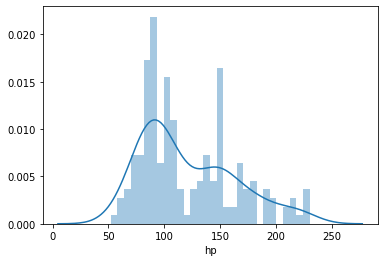

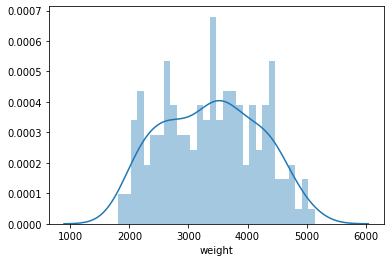

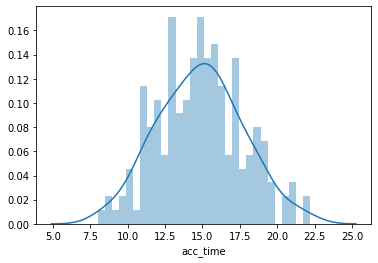

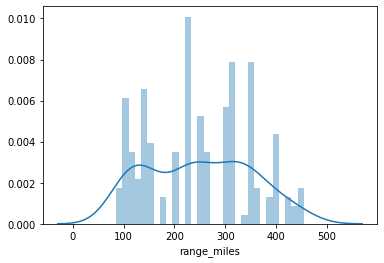

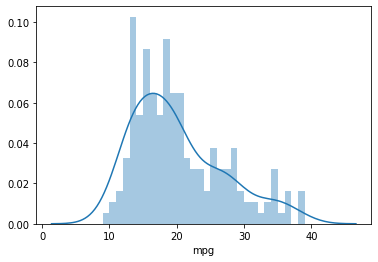

In [38]:
display_dist_hist(cars_numeric)

## Feature variance

In [39]:
cars_numeric_perc.var()

hp               1274.541512
weight         567068.921942
acc_time            6.105875
range_miles      8764.813262
mpg                45.674126
dtype: float64

Our features have not been scaled yet, we will examine the variance later once more

In [40]:
X = cars_numeric_perc._get_numeric_data().drop('mpg', axis=1)
y = cars_numeric_perc['mpg']
X, y

(        hp  weight  acc_time  range_miles
 0    130.0  3504.0      12.0        307.0
 1    165.0  3693.0      11.5        350.0
 2    150.0  3436.0      11.0        318.0
 3    150.0  3433.0      12.0        304.0
 4    140.0  3449.0      10.5        302.0
 ..     ...     ...       ...          ...
 180   90.0  2950.0      17.3        151.0
 181   86.0  2790.0      15.6        140.0
 182   84.0  2295.0      11.6        135.0
 183   79.0  2625.0      18.6        120.0
 184   82.0  2720.0      19.4        119.0
 
 [166 rows x 4 columns],
 0      18.0
 1      15.0
 2      18.0
 3      16.0
 4      17.0
        ... 
 180    27.0
 181    27.0
 182    32.0
 183    28.0
 184    31.0
 Name: mpg, Length: 166, dtype: float64)

## Let's apply a log normalization to the 'hp' column and see the result

In [41]:
from sklearn.preprocessing import PowerTransformer

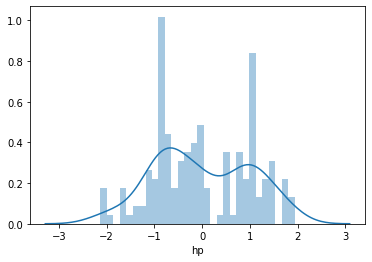

In [42]:
pt_scaler = PowerTransformer()

X['hp'] = pt_scaler.fit_transform(X[['hp']])
sns.distplot(X['hp'], bins=30)

Now the distribution is closer to the normal distribution

## Split the data

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train.shape, y_train.shape

((132, 4), (132,))

## Preparing a pipeline

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

#### 1. Scaling data

In [46]:
mm_scaler = MinMaxScaler()

mm_scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [47]:
X_train_scaled = mm_scaler.transform(X)

#### 2. Checking the variance

In [48]:
X.var()

hp                  1.006061
weight         567068.921942
acc_time            6.105875
range_miles      8764.813262
dtype: float64

In [49]:
X_train_scaled.var(axis=0)

array([0.06075029, 0.07067769, 0.03884219, 0.07405089])

#### 3. choosing the number of PCA components

In [50]:
pca = PCA()

pca.fit_transform(X_train_scaled)
pca.explained_variance_

array([0.20634179, 0.03061914, 0.00565372, 0.00318714])

Checking how much variance will be saved including each number of features

In [51]:
pca.explained_variance_ratio_.cumsum()

array([0.83946415, 0.96403258, 0.98703369, 1.        ])

Generating an 'elbow plot'

Text(0, 0.5, 'Explained variance ratio')

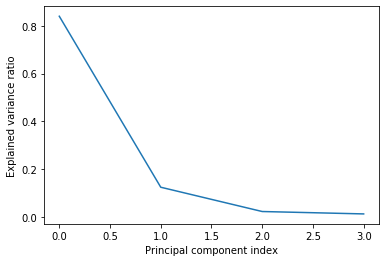

In [52]:
plt.plot(range(pca.n_components_), pca.explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')

Due to a small amount of features in this dataset, we are not going to discard any of them

Nevertheless I will include the step in the pipeline

### Creating a pipeline

In [53]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('var_thresh', VarianceThreshold(threshold=0.02)),
    ('reducer', PCA(n_components=4))
])

### Applying the pipeline to the training data

In [54]:
X_train_prepared = pipeline.fit_transform(X_train)

### Applying the pipeline to the test data

In [55]:
X_test_prepared = pipeline.transform(X_test)

## Predicting mpg based on the cars specifications

In [56]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import RandomizedSearchCV

## Ranfom Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [58]:
param_grid = {
             'max_depth': np.arange(2, 20),
             'n_estimators': np.linspace(100, 1000, 15, dtype=np.int32), 
             'min_samples_leaf':[0.01, 0.012, 0.016, 0.02, 0.03, 0.1, 3, 10, 15, 17, 20, 25, 30, 40, 50, 60, 70],
             'min_samples_split': np.arange(2, 20),
             'random_state': [42]
             }

rf_rand_cv = RandomizedSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise', n_jobs=-1, random_state=42)

rf_rand_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                          

In [59]:
pd.DataFrame(rf_rand_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.157380,0.003959,0.008378,0.000489,42,100,11,10,5,"{'random_state': 42, 'n_estimators': 100, 'min...",-22.454320,-10.503662,-8.898392,-10.885860,-8.022722,-12.152991,5.255375,5
1,0.627122,0.011448,0.031317,0.001353,42,421,5,0.02,2,"{'random_state': 42, 'n_estimators': 421, 'min...",-20.853292,-9.875584,-9.291431,-9.666669,-10.322855,-12.001966,4.438186,4
2,0.612161,0.004902,0.032713,0.002034,42,421,11,30,18,"{'random_state': 42, 'n_estimators': 421, 'min...",-31.041811,-17.804334,-13.085340,-20.037933,-15.703349,-19.534553,6.195716,8
3,0.236567,0.006568,0.013564,0.001197,42,164,7,70,13,"{'random_state': 42, 'n_estimators': 164, 'min...",-62.422406,-40.344870,-40.420162,-47.652653,-46.617810,-47.491580,8.059769,10
4,1.119405,0.006482,0.057447,0.001493,42,742,5,3,3,"{'random_state': 42, 'n_estimators': 742, 'min...",-19.751847,-8.475423,-7.991507,-8.797935,-9.699853,-10.943313,4.439431,2
5,0.701324,0.009040,0.035704,0.001323,42,485,4,70,19,"{'random_state': 42, 'n_estimators': 485, 'min...",-62.374491,-40.295940,-40.434633,-47.637981,-46.641138,-47.476837,8.047638,9
6,1.014486,0.010599,0.052659,0.003302,42,678,15,0.012,10,"{'random_state': 42, 'n_estimators': 678, 'min...",-18.747917,-8.972161,-8.437004,-9.076076,-10.173905,-11.081413,3.874586,3
7,0.238163,0.002705,0.013763,0.001323,42,164,10,20,11,"{'random_state': 42, 'n_estimators': 164, 'min...",-25.913129,-11.604198,-10.925571,-12.585431,-10.916837,-14.389033,5.794218,7
8,0.924127,0.034610,0.035505,0.005802,42,614,5,0.016,15,"{'random_state': 42, 'n_estimators': 614, 'min...",-18.336472,-7.355804,-7.299633,-7.752250,-10.650282,-10.278888,4.215848,1
9,0.391752,0.040263,0.020146,0.004434,42,292,8,15,5,"{'random_state': 42, 'n_estimators': 292, 'min...",-25.897761,-12.061154,-9.717895,-11.915599,-10.249390,-13.968360,6.034220,6


In [60]:
rf_rand_cv.best_params_

{'random_state': 42,
 'n_estimators': 614,
 'min_samples_split': 5,
 'min_samples_leaf': 0.016,
 'max_depth': 15}

In [61]:
rf_best_model = rf_rand_cv.best_estimator_

In [62]:
y_pred = rf_best_model.predict(X_test_prepared)

In [63]:
def examine_performance(y_test, y_pred):
    """Calculates the RMSE MAE and MAPE errors"""
    # RMSE
    rmse = np.sqrt(MSE(y_test, y_pred))
    # MAE
    mae = MAE(y_test, y_pred)
    # MAPE
    mape = np.mean(100 * abs(y_pred - y_test)/(y_test))
    return {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

In [64]:
print(examine_performance(y_test, y_pred))

{'RMSE': 11.419573057898763, 'MAE': 10.09582306776383, 'MAPE': 62.75017632004181}


## Feature importance

In [65]:
feature_names = X.columns
feature_importances = rf_best_model.feature_importances_

importance = sorted(zip(feature_importances, feature_names), reverse=True)
importance

[(0.457556948284316, 'range_miles'),
 (0.3642868819728984, 'weight'),
 (0.13308252915801452, 'hp'),
 (0.04507364058477103, 'acc_time')]

<BarContainer object of 4 artists>

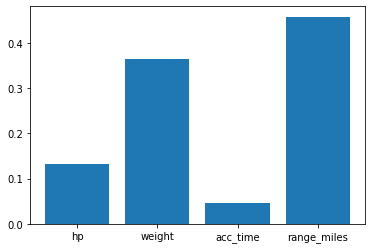

In [66]:
plt.bar(feature_names, feature_importances)

In [67]:
import eli5
from eli5.sklearn import PermutationImportance

rf_imp = PermutationImportance(rf_best_model, random_state=42).fit(X, y)
eli5.show_weights(rf_imp, feature_names=np.array(feature_names))

C:\Users\JTKubi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\JTKubi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.4128 ± 0.0696,range_miles
0.2627 ± 0.0569,weight
0.1932 ± 0.0285,hp
0.0542 ± 0.0253,acc_time


## SVR

In [68]:
from sklearn.svm import SVR

svr = SVR()

In [69]:
params = {'kernel':['linear', 'rbf'],
          'C': [0.1, 1, 3, 10, 20, 50, 100],
          'gamma':[0.01, 0.1, 0.5, 1, 2]
         }

svr_rand_cv = RandomizedSearchCV(svr, params, cv=5, scoring='neg_mean_squared_error')

svr_rand_cv.fit(X_train_prepared, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 3, 10, 20, 50, 100],
                                        'gamma': [0.01, 0.1, 0.5, 1, 2],
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [70]:
svr_rand_cv.best_params_

{'kernel': 'rbf', 'gamma': 2, 'C': 100}

In [71]:
pd.DataFrame(svr_rand_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000798,3.990178e-04,0.000399,0.000488,rbf,0.01,20,"{'kernel': 'rbf', 'gamma': 0.01, 'C': 20}",-31.302796,-15.750156,-12.068424,-22.215589,-20.268925,-20.321178,6.529773,8
1,0.000798,3.990415e-04,0.000199,0.000399,rbf,2,0.1,"{'kernel': 'rbf', 'gamma': 2, 'C': 0.1}",-48.785677,-31.228991,-20.646446,-35.370306,-30.473659,-33.301016,9.126687,9
2,0.001795,3.987313e-04,0.000399,0.000488,rbf,2,100,"{'kernel': 'rbf', 'gamma': 2, 'C': 100}",-21.477384,-9.535350,-7.594261,-9.131588,-6.309774,-10.809671,5.455784,1
3,0.000598,4.886555e-04,0.000199,0.000399,rbf,0.1,3,"{'kernel': 'rbf', 'gamma': 0.1, 'C': 3}",-27.928482,-13.269314,-11.216833,-19.441164,-17.978808,-17.966920,5.814421,7
4,0.000598,4.885777e-04,0.000399,0.000489,rbf,0.1,0.1,"{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.1}",-63.316064,-43.807055,-30.871166,-51.055685,-46.570494,-47.124093,10.517644,10
5,0.000997,1.507891e-07,0.000399,0.000489,rbf,1,50,"{'kernel': 'rbf', 'gamma': 1, 'C': 50}",-21.101219,-9.166652,-7.408636,-8.995807,-8.341916,-11.002846,5.086764,2
6,0.000798,3.989458e-04,0.000199,0.000399,rbf,0.5,3,"{'kernel': 'rbf', 'gamma': 0.5, 'C': 3}",-21.031905,-8.993673,-9.103508,-12.015037,-11.281792,-12.485183,4.434907,4
7,0.000798,3.989697e-04,0.000199,0.000399,rbf,2,3,"{'kernel': 'rbf', 'gamma': 2, 'C': 3}",-22.964522,-8.653819,-7.768964,-10.888869,-10.071513,-12.069537,5.554257,3
8,0.000598,4.884609e-04,0.000399,0.000489,linear,0.5,50,"{'kernel': 'linear', 'gamma': 0.5, 'C': 50}",-19.822081,-10.458618,-14.461904,-11.685828,-10.185839,-13.322854,3.585023,6
9,0.000997,0.000000e+00,0.000000,0.000000,linear,0.1,10,"{'kernel': 'linear', 'gamma': 0.1, 'C': 10}",-19.976203,-9.433769,-11.502466,-12.300976,-10.907857,-12.824254,3.697007,5


In [72]:
svr_best_model = svr_rand_cv.best_estimator_

svr_best_model.fit(X_train_prepared, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=2,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [73]:
y_pred = svr_best_model.predict(X_test_prepared)

In [74]:
print(examine_performance(y_test, y_pred))

{'RMSE': 2.3169389168984873, 'MAE': 1.7644202020801767, 'MAPE': 9.208067758414307}


The SVR model performed significantly better

## XGBOOST

In [75]:
# To be continued...